<a href="https://colab.research.google.com/github/Davron030901/PyTorch/blob/main/Regression_and_Classification_for_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression

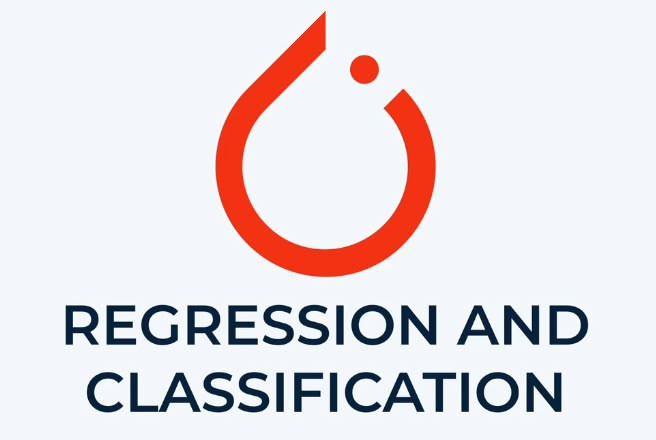

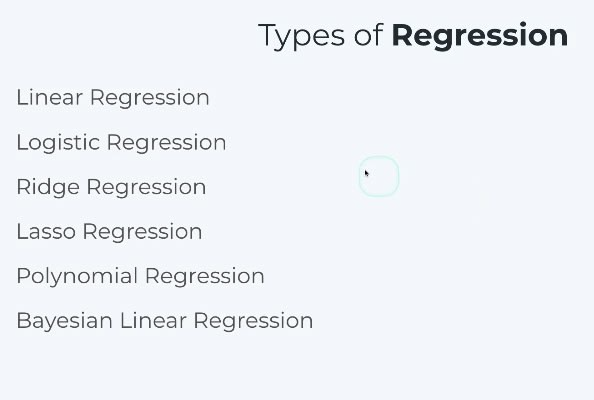

In [45]:
import torch
import numpy as np
import matplotlib.pyplot as plt

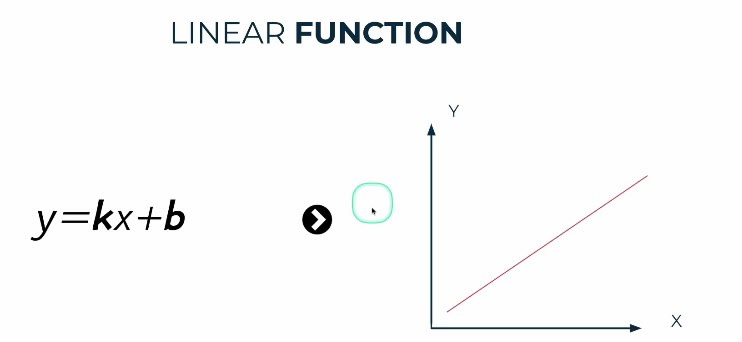

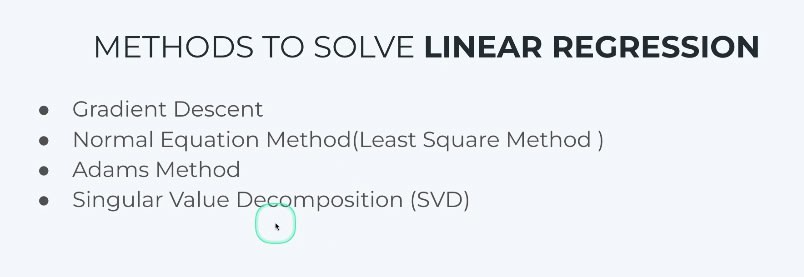

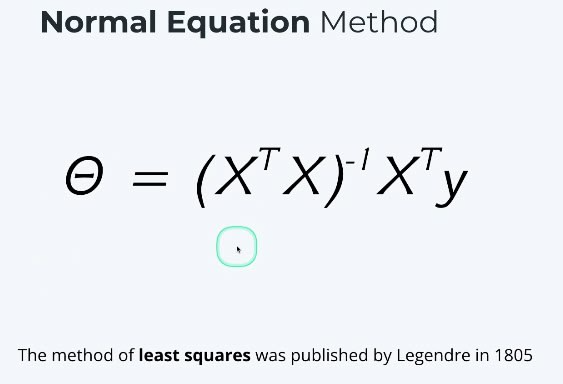

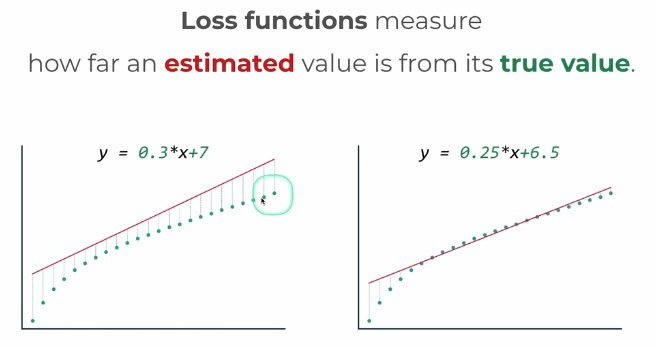

tensor([3.5000, 4.0000, 5.0000, 5.5000, 6.5000])
tensor([1.7000, 2.4000, 3.8000, 4.5000, 5.9000])


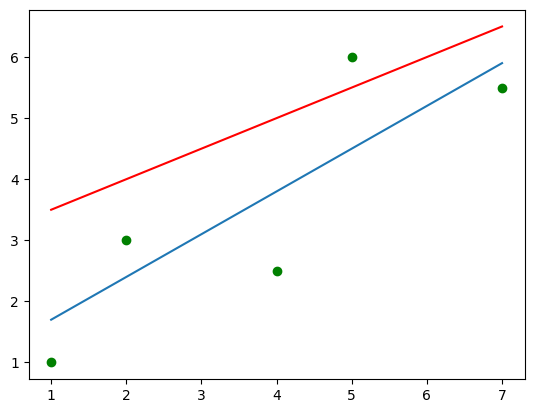

In [46]:
z=torch.tensor([1,2,4,5,7])
y=torch.tensor([1,3,2.5,6,5.5])
y1=0.5*z+3
print(y1)
y2=0.7*z+1
print(y2)
plt.scatter(z,y,color='g')
plt.plot(z,y1,color='r')
plt.plot(z,y2)
plt.show()

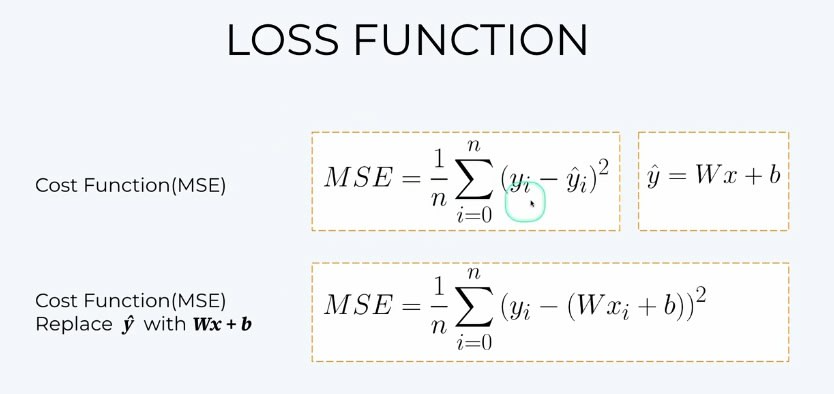

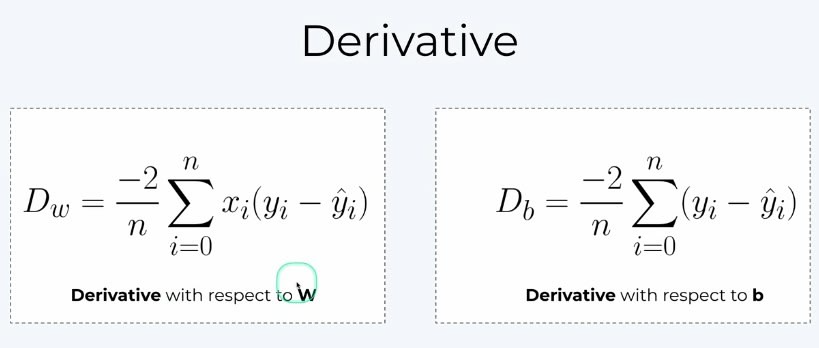

In [47]:
W1=0.5
b1=3

y1=W1*z+b1

W2=0.7
b2=1

y2=W2*z+b2

loss1=torch.mean((y-y1)**2)
loss2=torch.mean((y-y2)**2)
print(loss1,'\n',loss2)

tensor(2.9500) 
 tensor(0.9900)


In [48]:
x=torch.tensor([[5],[4]],dtype=torch.float32)
model=torch.nn.Linear(in_features=1,out_features=1) # y=W*x+b
print(f'W={model.weight}')
print(f'b={model.bias}') # har safar run qilsa qiymat o'zgaradi

W=Parameter containing:
tensor([[-0.1675]], requires_grad=True)
b=Parameter containing:
tensor([-0.9740], requires_grad=True)


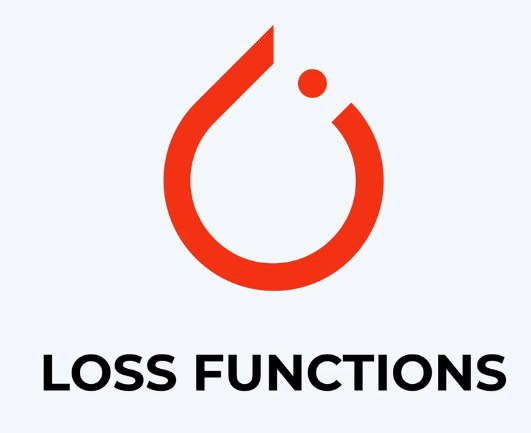

In [49]:
y_hat=model(x)
print(y_hat)

tensor([[-1.8116],
        [-1.6441]], grad_fn=<AddmmBackward0>)


In [50]:
x=torch.tensor([
    [1],
     [2],
    [4],
    [5],
    [7]],dtype=torch.float32)

y=torch.tensor([
    [1],
     [3],
    [2.5],
    [6],
    [5.5]],dtype=torch.float32)

model=torch.nn.Linear(in_features=1,out_features=1) # y=W*x+b
W=model.weight
b=model.bias
y_hat=model(x)
loss=torch.mean((y-y_hat)**2)
print(loss)
loss_function=torch.nn.MSELoss()
loss=loss_function(y,y_hat)
print(loss)
loss_function2=torch.nn.L1Loss()
loss=loss_function2(y,y_hat)
print(loss)

tensor(55.9764, grad_fn=<MeanBackward0>)
tensor(55.9764, grad_fn=<MseLossBackward0>)
tensor(6.5051, grad_fn=<MeanBackward0>)


In [51]:
loss_function=torch.nn.MSELoss()
optimimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [52]:
for i in range(100):
  optimimizer.zero_grad() #hosila olsa 0 chiqishi uchun
  y_hat=model(y)
  loss=loss_function(y,y_hat)
  loss.backward()
  optimimizer.step()
  loss=loss_function(y,y_hat)
  print(loss.item())

52.982826232910156
22.779560089111328
9.85653305053711
4.326661586761475
1.9598751068115234
0.9463834762573242
0.5118917226791382
0.3251253366470337
0.24435243010520935
0.2089346945285797
0.19292867183685303
0.1852348893880844
0.1811041384935379
0.1785045564174652
0.17656703293323517
0.17491929233074188
0.17340251803398132
0.17194826900959015
0.17052729427814484
0.16912704706192017
0.1677423119544983
0.16637057065963745
0.1650107502937317
0.16366222500801086
0.16232503950595856
0.16099867224693298
0.1596832424402237
0.15837858617305756
0.15708456933498383
0.15580114722251892
0.15452811121940613
0.15326562523841858
0.1520133912563324
0.1507713496685028
0.14953947067260742
0.14831767976284027
0.14710593223571777
0.14590391516685486
0.14471188187599182
0.14352945983409882
0.14235681295394897
0.141193687915802
0.14004001021385193
0.1388958841562271
0.13776108622550964
0.13663546741008759
0.1355191022157669
0.13441185653209686
0.1333136409521103
0.13222439587116241
0.13114412128925323
0.130

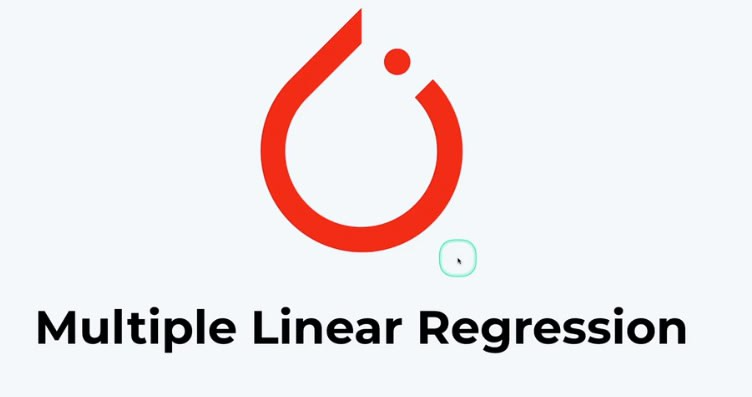

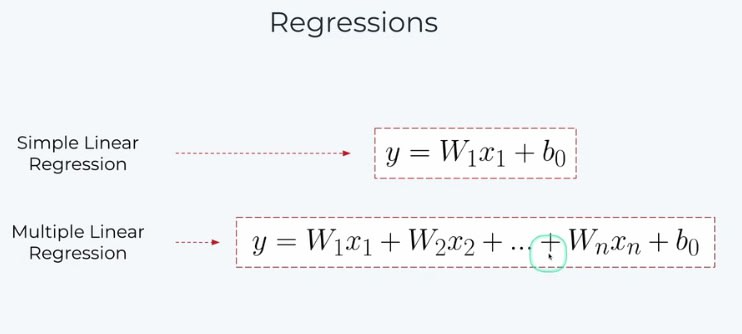

In [53]:
!wget https://raw.githubusercontent.com/Davron030901/PyTorch/main/data/computer.csv

--2025-01-31 19:57:28--  https://raw.githubusercontent.com/Davron030901/PyTorch/main/data/computer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140 [text/plain]
Saving to: ‘computer.csv.3’

computer.csv.3      100%[===================>]     140  --.-KB/s    in 0s      

2025-01-31 19:57:28 (7.16 MB/s) - ‘computer.csv.3’ saved [140/140]



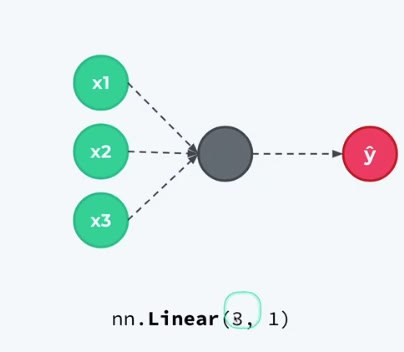

3 xususiyat soni

In [54]:
data = np.genfromtxt('/content/computer.csv',delimiter=',',skip_header=0,dtype=float)
print(data)
x,y=np.hsplit(data,[2])
print(x)
print(y)
x[:,0]=x[:,0]/100
y/=100
x_train=torch.tensor(x[:10],dtype=torch.float32)
y_train=torch.tensor(y[:10],dtype=torch.float32)
x_test=torch.tensor(x[10:],dtype=torch.float32)
y_test=torch.tensor(y[10:],dtype=torch.float32)
model=torch.nn.Linear(2,1)
loss_fn=torch.nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
for i in range(10):
  optimizer.zero_grad() #hosila olsa 0 chiqishi uchun
  y_hat=model(x_train)
  loss=loss_fn(y_train,y_hat)
  loss.backward()
  optimizer.step()
  print(loss.item())

[[1100.    4.  280.]
 [1600.    4.  300.]
 [1000.    8.  350.]
 [1500.   32.  500.]
 [2000.    4.  500.]
 [2200.   16.  700.]
 [2600.   32. 1050.]
 [2100.    8.  620.]
 [2400.   12.  780.]
 [3000.    8. 1000.]
 [3200.    8. 1100.]
 [1700.   16.  510.]]
[[1100.    4.]
 [1600.    4.]
 [1000.    8.]
 [1500.   32.]
 [2000.    4.]
 [2200.   16.]
 [2600.   32.]
 [2100.    8.]
 [2400.   12.]
 [3000.    8.]
 [3200.    8.]
 [1700.   16.]]
[[ 280.]
 [ 300.]
 [ 350.]
 [ 500.]
 [ 500.]
 [ 700.]
 [1050.]
 [ 620.]
 [ 780.]
 [1000.]
 [1100.]
 [ 510.]]
74.28133392333984
8134.22265625
1047183.6875
134852320.0
17365782528.0
2236301443072.0
287982590361600.0
3.708535038384538e+16
4.775714461593895e+18
6.14998898739763e+20


In [55]:
y_hat=model(x_test)
loss=loss_fn(y_test,y_hat)
print(loss.item())

9.376905152471389e+22


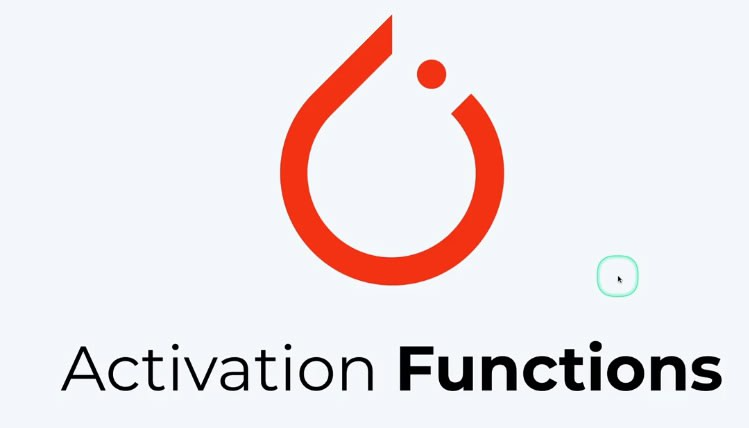

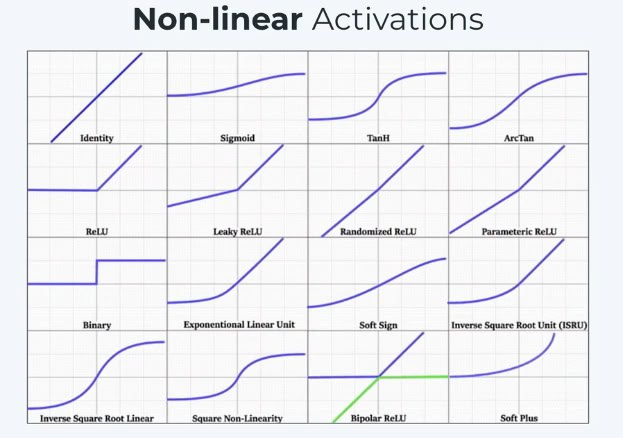

In [56]:
from torch import nn
m=nn.Sigmoid()
n=nn.ReLU()
x=torch.tensor([-3.5],dtype=torch.float32)
print(m(x))
print(n(x))# manfiy son 0ga ,musbatni o'zi

tensor([0.0293])
tensor([0.])


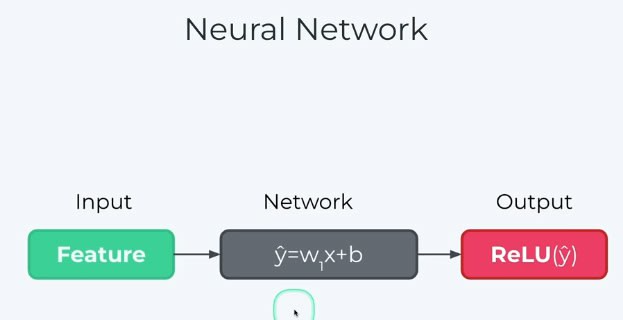

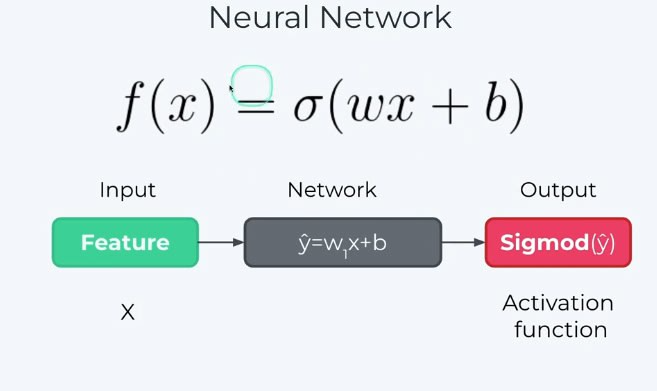

In [51]:
import cv2
from torch import nn

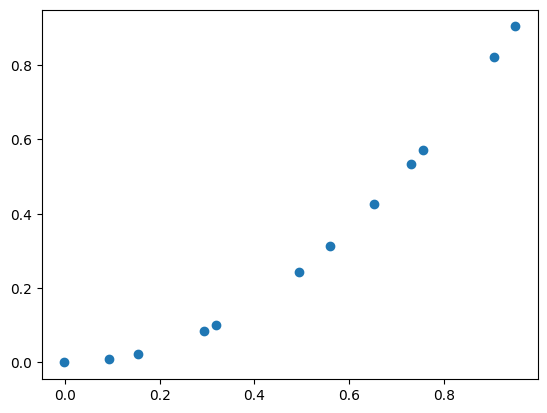

In [2]:
x=torch.linspace(0,1,12,dtype=torch.float32)
noise=np.random.normal(0,0.05,x.shape).astype(np.float32)
x+=noise
y=x*x

x=x.reshape(-1,1)
y=y.reshape(-1,1)
plt.scatter(x,y)
plt.show()

In [7]:
class Net(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc=torch.nn.Linear(1,1)
    self.af=torch.nn.Sigmoid()
  def forward(self,x):
    return self.af(self.fc(x))
#maxsus yaratilgan class

In [8]:
model=Net()
y_hat=model(x)
y_hat

tensor([[0.4403],
        [0.4478],
        [0.4528],
        [0.4639],
        [0.4660],
        [0.4801],
        [0.4855],
        [0.4930],
        [0.4993],
        [0.5014],
        [0.5135],
        [0.5170]], grad_fn=<SigmoidBackward0>)

In [10]:
criterion=torch.nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [17]:
epochs=1500
for i in range(epochs):
  optimizer.zero_grad() #hosila olsa 0 chiqishi uchun
  y_hat=model(x)
  loss=criterion(y,y_hat)
  loss.backward()
  optimizer.step()
  if epochs%10==0:
    print(f"loss{loss.item()}")

loss0.007014841306954622
loss0.006989923771470785
loss0.0069651249796152115
loss0.006940437015146017
loss0.006915867328643799
loss0.0068914094008505344
loss0.006867069285362959
loss0.0068428367376327515
loss0.006818721070885658
loss0.006794714834541082
loss0.006770818028599024
loss0.0067470320500433445
loss0.006723358761519194
loss0.006699791643768549
loss0.006676331628113985
loss0.006652983371168375
loss0.006629739422351122
loss0.006606601644307375
loss0.006583572831004858
loss0.006560647394508123
loss0.006537826731801033
loss0.006515109445899725
loss0.00649249879643321
loss0.00646998779848218
loss0.006447579246014357
loss0.006425275932997465
loss0.006403071340173483
loss0.006380969658493996
loss0.006358962506055832
loss0.0063370633870363235
loss0.006315258797258139
loss0.006293553858995438
loss0.006271942984312773
loss0.006250435020774603
loss0.006229018326848745
loss0.006207702215760946
loss0.006186480168253183
loss0.006165352184325457
loss0.006144318729639053
loss0.0061233812011778

In [18]:
pred =model(x)

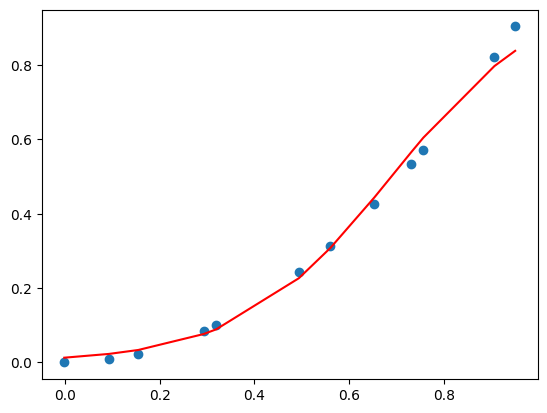

In [19]:
plt.scatter(x,y)
plt.plot(x,pred.detach().numpy(),c='r')
plt.show()

#Classification

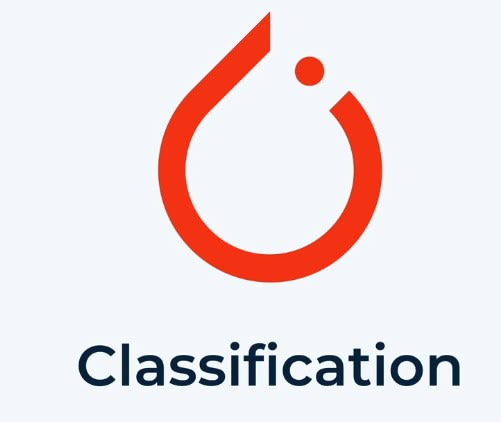

In [20]:
from sklearn.datasets import make_blobs

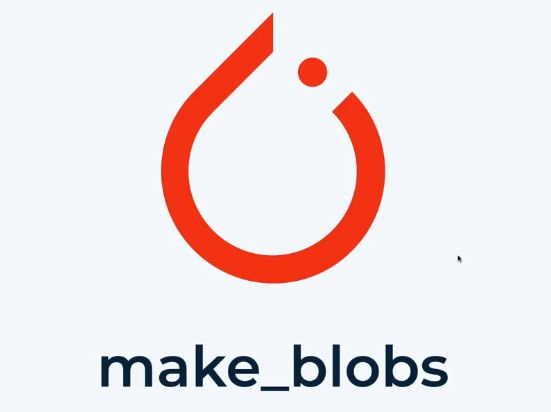

In [33]:
X,y=make_blobs(n_samples=250,n_features=2,centers=2,random_state=42)

In [36]:
y=y.reshape(-1,1)

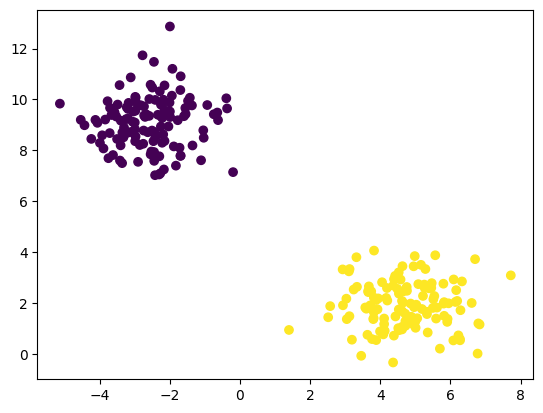

In [37]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

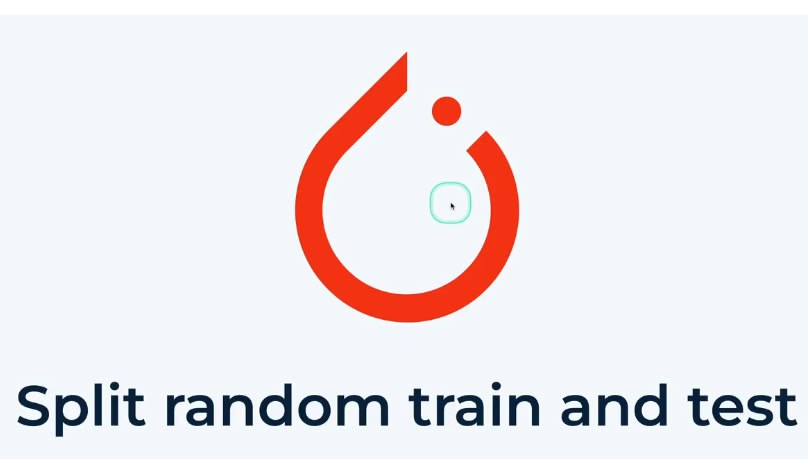

<ipython-input-39-d5e581067a49>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y,dtype=torch.float32)


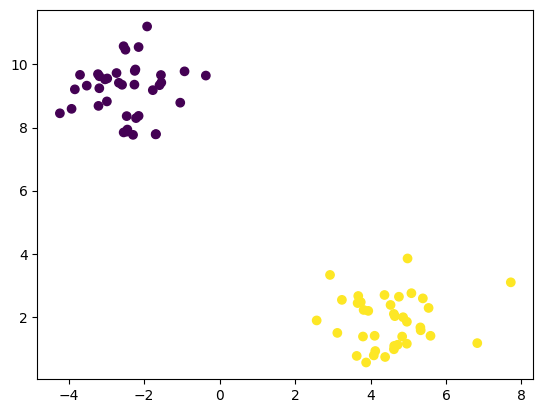

In [39]:
from sklearn.model_selection import train_test_split
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

In [40]:
class Net(torch.nn.Module):
  def __init__(self,input,output):
    super().__init__()
    self.fc1=torch.nn.Linear(in_features=input,out_features=8)
    self.fc2=torch.nn.Linear(in_features=8,out_features=output)
    self.act=torch.nn.Sigmoid()
    #Activation function

  def forward(self,x):
    x=self.fc1(x)
    x=self.fc2(x)
    #out=torch.sigmoid(x)
    out=self.act(x)
    return out

In [42]:
model=Net(2,1)
criterion=torch.nn.BCELoss()
lr=0.01
optimizer=torch.optim.Adam(model.parameters(),lr=lr)
epochs=10
for epoch in range(epochs):
  #Clear the previous gradients to evoid accumulation
  optimizer.zero_grad()
  #Calculate predicted values
  y_hat=model(X_train)
  #Compute the loss between predicted values and actual targets
  loss=criterion(y_hat,y_train)
  #Compute gradients of the loss with respect to model parametrs
  loss.backward()
  #Update the model parameters using the computed gradients
  optimizer.step()
  pred=model(X_test)
  if epoch%1==0:
    print(f'epoch{epoch}: \tloss:\t{loss.item()}')

epoch0: 	loss:	0.6406047940254211
epoch1: 	loss:	0.5514096617698669
epoch2: 	loss:	0.47214552760124207
epoch3: 	loss:	0.40275707840919495
epoch4: 	loss:	0.3425808846950531
epoch5: 	loss:	0.29087525606155396
epoch6: 	loss:	0.24690726399421692
epoch7: 	loss:	0.20984765887260437
epoch8: 	loss:	0.1788000762462616
epoch9: 	loss:	0.15287643671035767


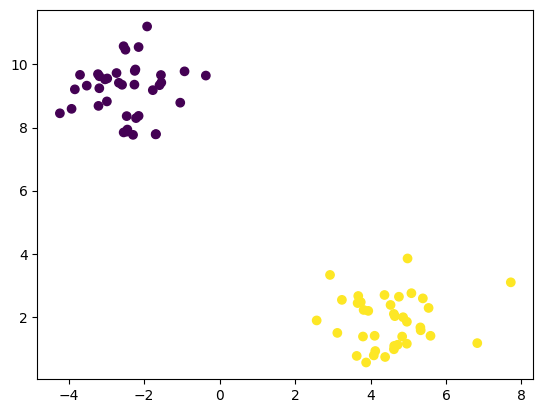

In [43]:
pred=model(X_test)>0.5
# print(pred[:5]>0.5)
# print(y_test[:5])
plt.scatter(X_test[:,0],X_test[:,1],c=pred.detach().numpy())
plt.show()

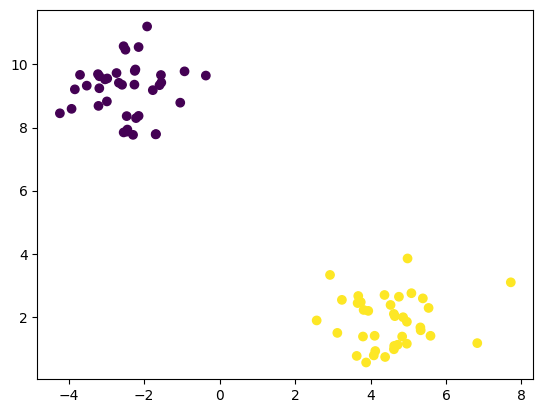

In [44]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.show()

In [45]:
print(sum((pred>0.5)==y_test)/(len(y_test))*100)

tensor([100.])


In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)
# shu joyi o'zgaradi

In [47]:
model=Net(2,1)
criterion=torch.nn.BCELoss()
lr=0.01
optimizer=torch.optim.Adam(model.parameters(),lr=lr)
def train(model,optimizer,criterion,X_train,y_train,epochs=50,print_every=5):
  history_loss=[]
  history_accuracy=[]
  n=len(y_test)
  for epoch in range(epochs):
    #Clear the previous gradients to evoid accumulation
    optimizer.zero_grad()
    #Calculate predicted values
    y_hat=model(X_train)
    #Compute the loss between predicted values and actual targets
    loss=criterion(y_hat,y_train)
    #Update the total loss.
    history_loss.append(loss.item())
    #Evaluate the model on the test dataset.
    pred=model(X_test)
    acc=(sum((pred>0.5)==y_test)/n)*100
    #Update the total accuracy.
    history_accuracy.append(acc.item())
    #Compute gradients of the loss with respect to model parametrs
    loss.backward()
    #Update the model parameters using the computed gradients
    optimizer.step()
    #Print the loss and accuracy every epoch.
    if epoch%print_every==0:
      print(f'epoch {epoch}, \tloss:\t{loss.item():0.2f} \t acc: {acc.item()}')
  return history_loss,history_accuracy

In [49]:
history_loss,history_accuracy=train(model,optimizer,criterion,X_train,y_train)
print(history_loss)

epoch 0, 	loss:	1.08 	 acc: 49.333335876464844
epoch 5, 	loss:	0.53 	 acc: 100.0
epoch 10, 	loss:	0.28 	 acc: 100.0
epoch 15, 	loss:	0.15 	 acc: 100.0
epoch 20, 	loss:	0.09 	 acc: 100.0
epoch 25, 	loss:	0.06 	 acc: 100.0
epoch 30, 	loss:	0.04 	 acc: 100.0
epoch 35, 	loss:	0.03 	 acc: 100.0
epoch 40, 	loss:	0.02 	 acc: 100.0
epoch 45, 	loss:	0.02 	 acc: 100.0
[1.0758159160614014, 0.9344133734703064, 0.8101152777671814, 0.701216995716095, 0.6071237921714783, 0.5269088745117188, 0.45903006196022034, 0.4016198217868805, 0.35283389687538147, 0.3110833466053009, 0.2751117944717407, 0.24396249651908875, 0.2169044017791748, 0.19336064159870148, 0.1728566586971283, 0.1549869179725647, 0.1393970102071762, 0.1257743537425995, 0.11384398490190506, 0.10336627066135406, 0.09413488954305649, 0.08597423881292343, 0.07873625308275223, 0.07229682058095932, 0.06655194610357285, 0.06141435727477074, 0.05681030452251434, 0.052676886320114136, 0.04896005243062973, 0.04561280831694603, 0.042594075202941895, 

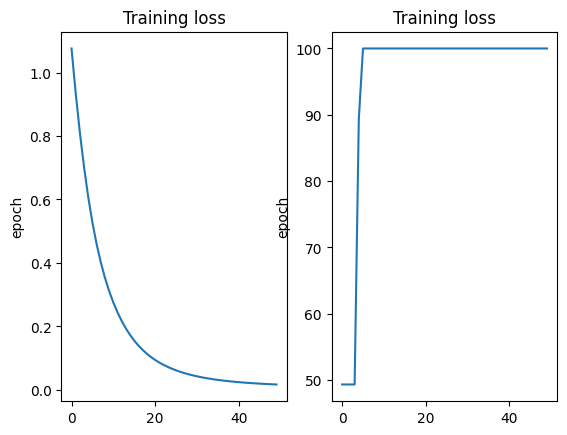

In [66]:
fig,ax=plt.subplots(1,2)
ax[0].plot(history_loss)
ax[1].plot(history_accuracy)
ax[0].set_title('Training loss')
ax[1].set_title('Training loss')
ax[1].set_ylabel('epoch')
ax[0].set_ylabel('epoch')
plt.show()